In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('Bitcoin Historical Data - Investing.com India (1).csv',index_col=0,parse_dates=['Date'])

In [62]:
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-23,"61,496.4","60,693.2","61,728.7","59,738.3",67.33K,1.33%
2021-10-22,"60,690.3","62,200.8","63,699.7","60,055.7",75.69K,-2.44%
2021-10-21,"62,210.2","66,004.6","66,616.9","62,092.1",105.38K,-5.71%
2021-10-20,"65,979.1","64,276.9","66,967.1","63,543.7",79.87K,2.65%
2021-10-19,"64,278.5","62,030.2","64,454.0","61,451.0",80.16K,3.58%
...,...,...,...,...,...,...
2020-10-27,"13,657.8","13,061.5","13,782.3","13,050.3",128.64K,4.56%
2020-10-26,"13,061.6","13,033.0","13,229.7","12,792.4",89.47K,0.23%
2020-10-25,"13,032.2","13,117.0","13,345.3","12,900.4",59.73K,-0.65%


In [3]:
# convert string it to float
df.describe()

,Price,Open,High,Low,Vol.,Change %
count,366,366,366,366,366,366
unique,366,365,366,366,364,327
top,"34,679.7","37,294.3","47,836.0","47,870.1",84.08K,-0.06%
freq,1,2,1,1,2,3


In [4]:
print(type(df['Price'][0]))

<class 'str'>


In [5]:
# Remove K and % from last two columns to perform numeric operations onto it

# The numeric data which is of string type is converted to float type and also K n % will be removed/  
data1 = df.replace('[^\d.]','', regex=True).astype(float)

In [7]:
data1

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2021-10-23,61496.4,60693.2,61728.7,59738.3,67.33,1.33
2021-10-22,60690.3,62200.8,63699.7,60055.7,75.69,2.44
2021-10-21,62210.2,66004.6,66616.9,62092.1,105.38,5.71
2021-10-20,65979.1,64276.9,66967.1,63543.7,79.87,2.65
2021-10-19,64278.5,62030.2,64454.0,61451.0,80.16,3.58
...,...,...,...,...,...,...
2020-10-27,13657.8,13061.5,13782.3,13050.3,128.64,4.56
2020-10-26,13061.6,13033.0,13229.7,12792.4,89.47,0.23
2020-10-25,13032.2,13117.0,13345.3,12900.4,59.73,0.65


In [8]:
data1.describe()

,Price,Open,High,Low,Vol.,Change %
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,40352.604645,40220.922951,41507.159290,38839.059836,115.877650,3.183989
std,13685.441445,13714.154976,14030.541407,13332.016552,63.838699,2.889593
min,12934.100000,12933.600000,13025.500000,12738.900000,0.260000,0.000000
25%,32751.250000,32556.650000,33846.700000,31211.000000,74.290000,1.035000
50%,40625.300000,40564.850000,42274.850000,38829.450000,103.655000,2.375000
75%,50318.550000,50065.975000,52078.375000,48859.475000,137.510000,4.547500
max,65979.100000,66004.600000,66967.100000,63543.700000,607.100000,19.410000


In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2021-10-23 to 2020-10-23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     366 non-null    float64
 1   Open      366 non-null    float64
 2   High      366 non-null    float64
 3   Low       366 non-null    float64
 4   Vol.      366 non-null    float64
 5   Change %  366 non-null    float64
dtypes: float64(6)
memory usage: 20.0 KB


In [10]:
data1.loc[data1['Price'] < data1['Open'] , 'Buy'] = 0
data1.loc[data1['Price'] > data1['Open'] , 'Buy'] = 1

In [11]:
data1

,Price,Open,High,Low,Vol.,Change %,Buy
Date,,,,,,,
2021-10-23,61496.4,60693.2,61728.7,59738.3,67.33,1.33,1.0
2021-10-22,60690.3,62200.8,63699.7,60055.7,75.69,2.44,0.0
2021-10-21,62210.2,66004.6,66616.9,62092.1,105.38,5.71,0.0
2021-10-20,65979.1,64276.9,66967.1,63543.7,79.87,2.65,1.0
2021-10-19,64278.5,62030.2,64454.0,61451.0,80.16,3.58,1.0
...,...,...,...,...,...,...,...
2020-10-27,13657.8,13061.5,13782.3,13050.3,128.64,4.56,1.0
2020-10-26,13061.6,13033.0,13229.7,12792.4,89.47,0.23,1.0
2020-10-25,13032.2,13117.0,13345.3,12900.4,59.73,0.65,0.0


In [12]:
data1.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
Buy         0
dtype: int64

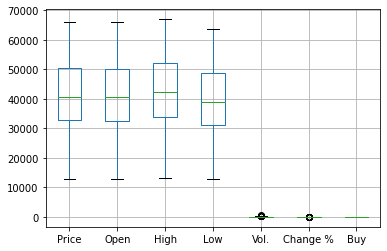

In [13]:
data1.boxplot()

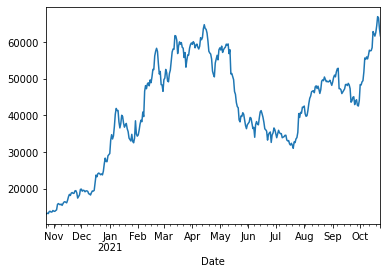

In [14]:
ax = data1['High'].plot(style=['-'])

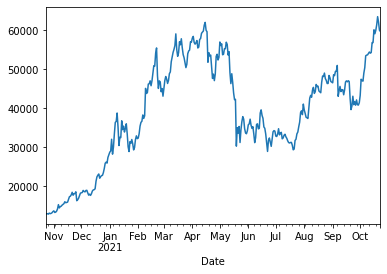

In [15]:
ax = data1['Low'].plot(style=['-'])

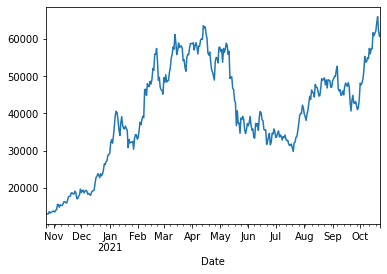

In [16]:
ax = data1['Price'].plot(style=['-'])

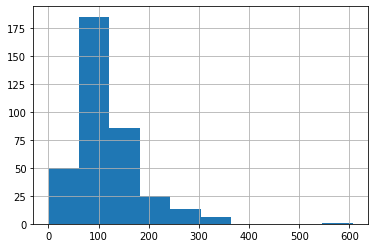

In [63]:
data1['Vol.'].hist()

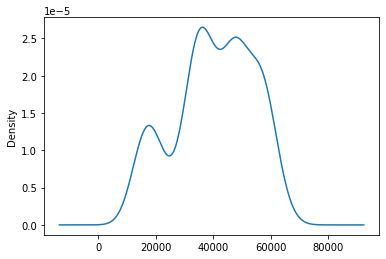

In [18]:
# Kernel Distribution
ax = data1['Price'].plot(kind= 'kde')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency -1D will be used.
  % freq, ValueWarning)


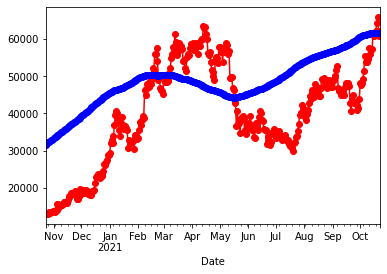

In [19]:
# Exponential smoothing 

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

model = SimpleExpSmoothing(data1['Price']).fit(smoothing_level=.01, optimized = False)

data1['Price'].plot(marker='o', color='red')
model.fittedvalues.plot(marker='o', color='blue')

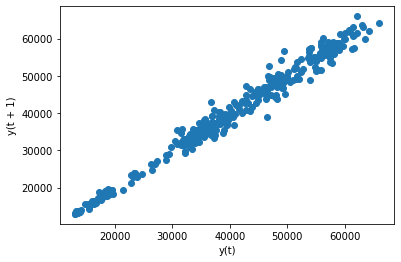

In [20]:
# Randomness in the Price Column
from pandas.plotting import lag_plot
lag_plot(data1['Price'])

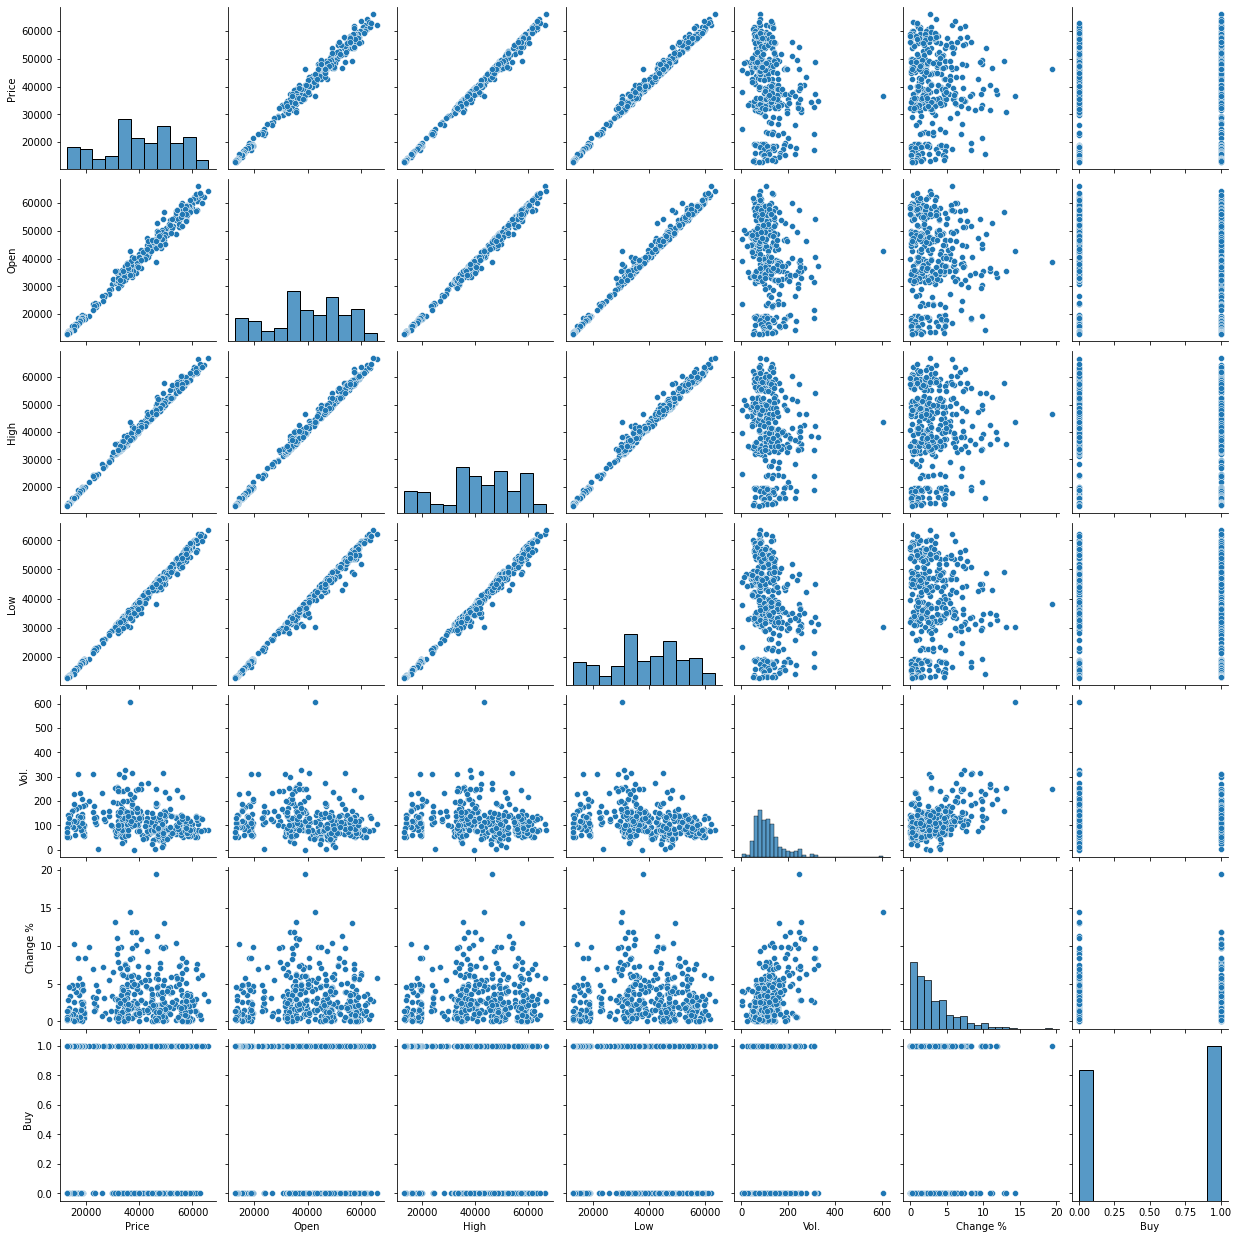

In [21]:
sns.pairplot(data=data1)

LSTM

In [22]:
df1 = data1['Price']

In [23]:
df1

Date
2021-10-23    61496.4
2021-10-22    60690.3
2021-10-21    62210.2
2021-10-20    65979.1
2021-10-19    64278.5
               ...   
2020-10-27    13657.8
2020-10-26    13061.6
2020-10-25    13032.2
2020-10-24    13117.2
2020-10-23    12934.1
Name: Price, Length: 366, dtype: float64

In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1)) #Transform features by scaling
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [26]:
df1

array([[0.91549251],
       [0.90029598],
       [0.92894901],
       [1.        ],
       [0.96794043],
       [0.9260477 ],
       [0.9160788 ],
       [0.90351588],
       [0.91881233],
       [0.83724573],
       [0.83789236],
       [0.81217457],
       [0.83972476],
       [0.78713545],
       [0.79193892],
       [0.77256292],
       [0.77009709],
       [0.79911585],
       [0.72646244],
       [0.68419644],
       [0.66483175],
       [0.6547799 ],
       [0.66381186],
       [0.58232067],
       [0.53921576],
       [0.52951645],
       [0.55120181],
       [0.57063437],
       [0.56089547],
       [0.56340466],
       [0.60203789],
       [0.5771986 ],
       [0.52252239],
       [0.56436045],
       [0.64670751],
       [0.66684136],
       [0.64753888],
       [0.65630879],
       [0.66352154],
       [0.64366858],
       [0.6035517 ],
       [0.62453012],
       [0.60755585],
       [0.6015402 ],
       [0.63062494],
       [0.62451315],
       [0.6380526 ],
       [0.749

In [27]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [28]:
training_size,test_size

(256, 110)

In [29]:
train_data

array([[0.91549251],
       [0.90029598],
       [0.92894901],
       [1.        ],
       [0.96794043],
       [0.9260477 ],
       [0.9160788 ],
       [0.90351588],
       [0.91881233],
       [0.83724573],
       [0.83789236],
       [0.81217457],
       [0.83972476],
       [0.78713545],
       [0.79193892],
       [0.77256292],
       [0.77009709],
       [0.79911585],
       [0.72646244],
       [0.68419644],
       [0.66483175],
       [0.6547799 ],
       [0.66381186],
       [0.58232067],
       [0.53921576],
       [0.52951645],
       [0.55120181],
       [0.57063437],
       [0.56089547],
       [0.56340466],
       [0.60203789],
       [0.5771986 ],
       [0.52252239],
       [0.56436045],
       [0.64670751],
       [0.66684136],
       [0.64753888],
       [0.65630879],
       [0.66352154],
       [0.64366858],
       [0.6035517 ],
       [0.62453012],
       [0.60755585],
       [0.6015402 ],
       [0.63062494],
       [0.62451315],
       [0.6380526 ],
       [0.749

In [30]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [31]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [32]:
print(X_train)

[[0.91549251 0.90029598 0.92894901 ... 0.79911585 0.72646244 0.68419644]
 [0.90029598 0.92894901 1.         ... 0.72646244 0.68419644 0.66483175]
 [0.92894901 1.         0.96794043 ... 0.68419644 0.66483175 0.6547799 ]
 ...
 [0.67599962 0.6691281  0.70621171 ... 0.68311057 0.65985861 0.6731888 ]
 [0.6691281  0.70621171 0.66905646 ... 0.65985861 0.6731888  0.64538788]
 [0.70621171 0.66905646 0.69113771 ... 0.6731888  0.64538788 0.64921482]]


In [33]:
print(X_train.shape), print(y_train.shape)

(235, 20)
(235,)


(None, None)

In [34]:
print(X_test.shape), print(ytest.shape)

(89, 20)
(89,)


(None, None)

In [35]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [36]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [37]:
model=Sequential() #Sequential model
model.add(LSTM(50,return_sequences=True,input_shape=(20,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
4/4 [==============================] - 7s 514ms/step - loss: 0.3298 - val_loss: 0.0134
Epoch 2/100
4/4 [==============================] - 0s 55ms/step - loss: 0.0652 - val_loss: 0.0643
Epoch 3/100
4/4 [==============================] - 0s 51ms/step - loss: 0.0502 - val_loss: 0.0493
Epoch 4/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0150 - val_loss: 0.0188
Epoch 5/100
4/4 [==============================] - 0s 50ms/step - loss: 0.0255 - val_loss: 0.0187
Epoch 6/100
4/4 [==============================] - 0s 55ms/step - loss: 0.0187 - val_loss: 0.0331
Epoch 7/100
4/4 [==============================] - 0s 51ms/step - loss: 0.0124 - val_loss: 0.0523
Epoch 8/100
4/4 [==============================] - 0s 52ms/step - loss: 0.0155 - val_loss: 0.0435
Epoch 9/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0109 - val_loss: 0.0300
Epoch 10/100
4/4 [==============================] - 0s 49ms/step - loss: 0.0122 - val_loss: 0.0278
Epoch 11/100
4/4 [

In [109]:
import tensorflow as tf

In [110]:
tf.__version__

'2.6.0'

In [111]:
# Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [112]:
# Transformback to original form 
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [113]:
# Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.06119841886474951

In [114]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.07713966469121093

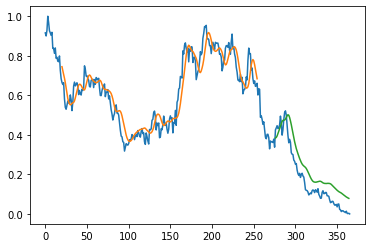

In [108]:
# Plotting 
# shift train predictions for plotting
look_back=20
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#blue color is the complete dataset
#green - predicted output
#orange - training dataset

In [106]:
len(test_data)

110

In [107]:
x_input=test_data[90:].reshape(1,-1)
x_input.shape

(1, 20)

In [92]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [93]:
temp_input

[0.052063342445093766,
 0.04466962013384863,
 0.045114525402959745,
 0.048064850598548384,
 0.03571118861344142,
 0.049840701291356385,
 0.050014138938637,
 0.022839098878310874,
 0.02046941276274861,
 0.01182580827599206,
 0.015558488076161728,
 0.016272975775285085,
 0.011797530398718063,
 0.009861438401357338,
 0.006500141389386373,
 0.013643133188801951,
 0.002403619568291077,
 0.0018493731737204426,
 0.0034517862192477997,
 0.0]

In [115]:
# demonstrate prediction for next 20 days
from numpy import array

lst_output=[]
n_steps=20
i=0
while(i<5):
    
    if(len(temp_input)>20):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.07492767 0.07525633 0.07812342 0.08329162 0.0902264  0.09831718
 0.10714018 0.11629407 0.12547752 0.13461423 0.14361842 0.15249225
 0.16122337 0.16980731 0.17826387 0.18660253 0.19486162 0.20299861
 0.21105316 0.21903625]
0 day output [[0.22693641]]
1 day input [0.07525633 0.07812342 0.08329162 0.0902264  0.09831718 0.10714018
 0.11629407 0.12547752 0.13461423 0.14361842 0.15249225 0.16122337
 0.16980731 0.17826387 0.18660253 0.19486162 0.20299861 0.21105316
 0.21903625 0.22693641]
1 day output [[0.23497517]]
2 day input [0.07812342 0.08329162 0.0902264  0.09831718 0.10714018 0.11629407
 0.12547752 0.13461423 0.14361842 0.15249225 0.16122337 0.16980731
 0.17826387 0.18660253 0.19486162 0.20299861 0.21105316 0.21903625
 0.22693641 0.23497517]
2 day output [[0.24289788]]
3 day input [0.08329162 0.0902264  0.09831718 0.10714018 0.11629407 0.12547752
 0.13461423 0.14361842 0.15249225 0.16122337 0.16980731 0.17826387
 0.18660253 0.19486162 0.20299861 0.21105316 0.21903625 0.2

In [116]:
day_new=np.arange(1,21)
day_pred=np.arange(21,26)

In [97]:
import matplotlib.pyplot as plt

In [117]:
len(df1)

366

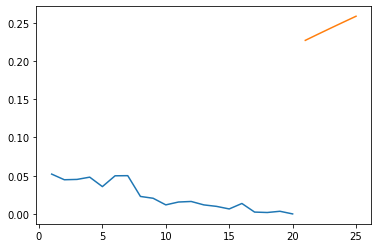

In [118]:
plt.plot(day_new,scaler.inverse_transform(df1[346:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

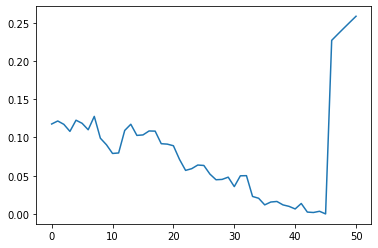

In [123]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[320:])

In [120]:
df3=scaler.inverse_transform(df3).tolist()

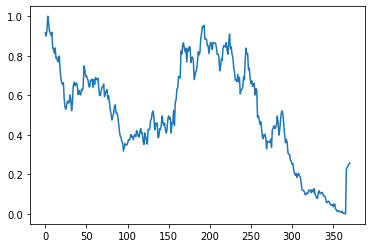

In [121]:
plt.plot(df3)